# Montes Claros intrusion of Goias Alkaline Province

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import pandas as pd

In [3]:
notebook_name = 'MC_intrusion_plot.ipynb'

### Plot Style

In [4]:
plt.style.use('ggplot')

#### Open a dictionary

In [5]:
data_set = dict()

#### Saving files

In [6]:
saved_files = []

## Loading real data for Diorama complex

### Columns to load and filename

In [7]:
filename = 'data_filtered_XYZ_area_40'

In [8]:
names = ['X','Y','GPSALT','MAGRAW','MAGIGRF','IGRF','LONG','LAT']

### Real data

In [9]:
data = pd.read_csv(filename,usecols=(0,1,2,3,4,5,6,7),na_values= '*',
                   names=names,skipinitialspace=True,delim_whitespace=True).dropna(axis=0)

## Properties of survey

### Total field anomaly 

In [10]:
data_set['total_field_40'] = data.iloc[:,3].get_values()

In [11]:
data_set['tfa_40'] = data.iloc[:,4].get_values()

In [12]:
data_set['igrf_40'] = data.iloc[:,5].get_values()

In [13]:
data_set['tfa_calc_40'] = data_set['total_field_40'] - data_set['igrf_40']

#### Observation coordinates

In [14]:
data_set['x'] = data.iloc[:,1].get_values()

In [15]:
data_set['y'] = data.iloc[:,0].get_values()

In [16]:
data_set['elev'] = data.iloc[:,2].get_values()

In [17]:
data_set['height'] = - np.mean(data_set['elev'])

In [18]:
data_set['height'] 

-549.7912702853945

In [19]:
#data_set['z'] = data_set['height']*np.ones_like(data_set['x'])

In [20]:
data_set['z'] = - data_set['elev']

#### Survey information

In [21]:
data_set['N'] = np.size(data_set['tfa_40'])

In [22]:
data_set['dx'] = data_set['x'][0] - data_set['x'][1]

In [23]:
Nx = abs(int(((data_set['x'].max() - data_set['x'].min())/(data_set['dx']))))

In [24]:
Ny = data_set['N']/Nx

In [25]:
data_set['dy'] = abs(int(((data_set['y'].max() - data_set['y'].min())/(Ny-1))))

In [26]:
data_set['shape'] = Nx,Ny

In [27]:
print 'Shape : (%.0f,%.0f)'% data_set['shape'] 
print 'Number of data: %.1f' % data_set['N']
print 'dx: %.1f m' % data_set['dx']
print 'dy: %.1f m ' % data_set['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


#### Main field

In [28]:
inc_gf = -19.5

In [29]:
dec_gf = -18.5

In [30]:
data_set['main_field'] = inc_gf,dec_gf 

In [31]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Real data visualization for Montes claros complex

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


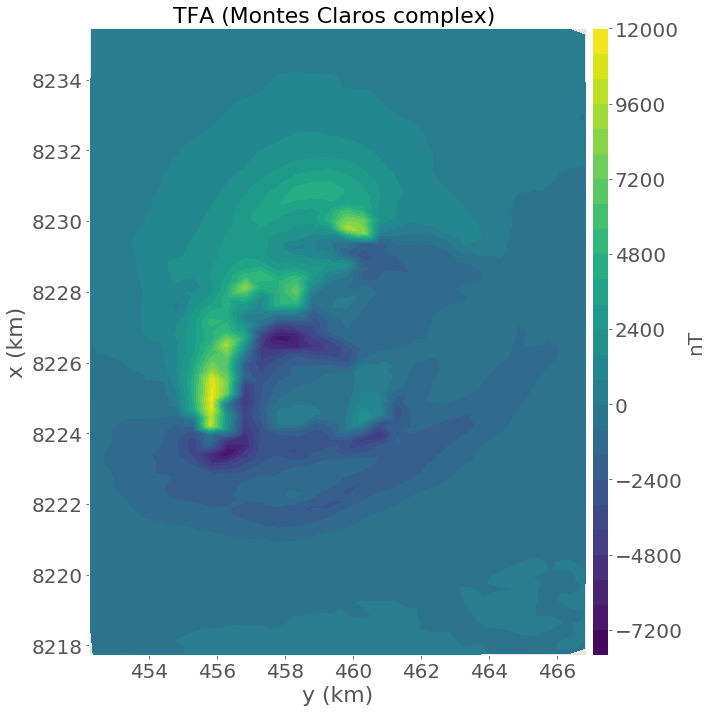

In [32]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('TFA (Montes Claros complex) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['tfa_40'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/data_montes_claros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

### Observation Coordinates

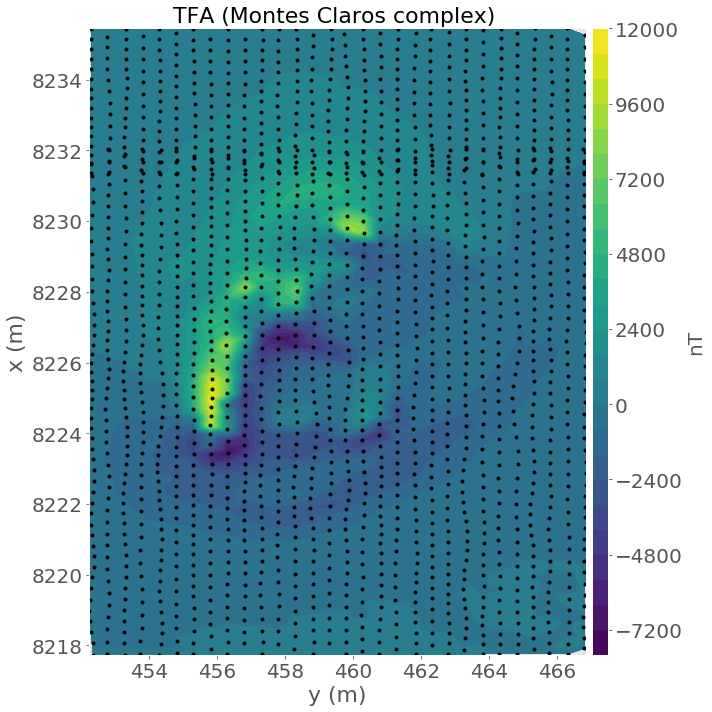

In [33]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('TFA (Montes Claros complex) ', fontsize=title_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],data_set['tfa_40'],30, cmap='viridis')
plt.plot(1e-3*data_set['y'],1e-3*data_set['x'],'k.')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)



file_name = 'figs/RTP_data_montes_claros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### IGRF Visualization for Montes claros area

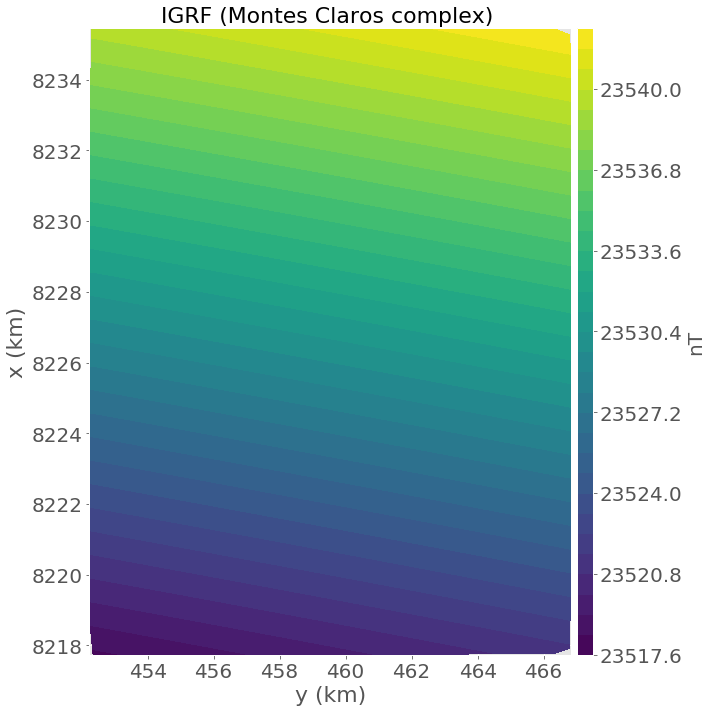

In [34]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('IGRF (Montes Claros complex) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['igrf_40'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/igrf_data_montes_claros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Total field for Montes Claros 

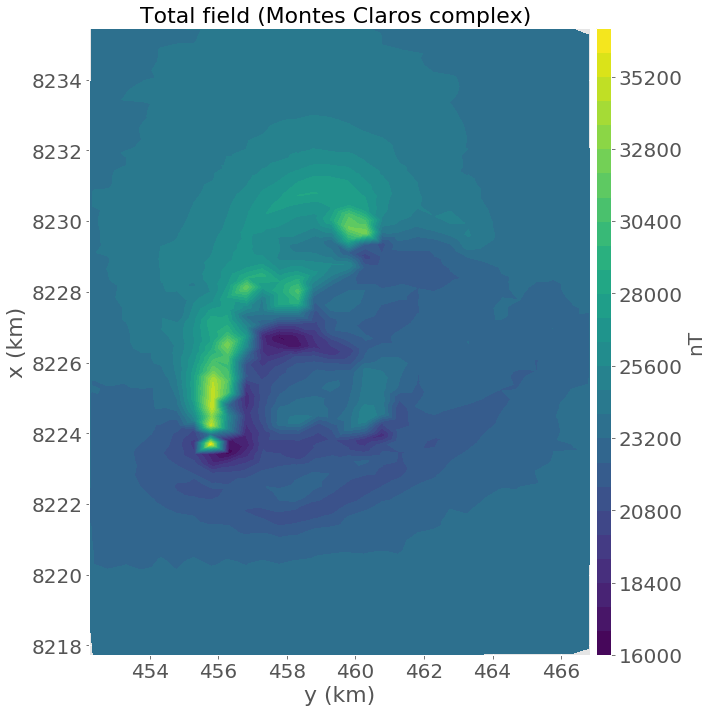

In [35]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('Total field (Montes Claros complex) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['total_field_40'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/total_field_data_montes_claros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Total field anomaly calculated for Montes Claros

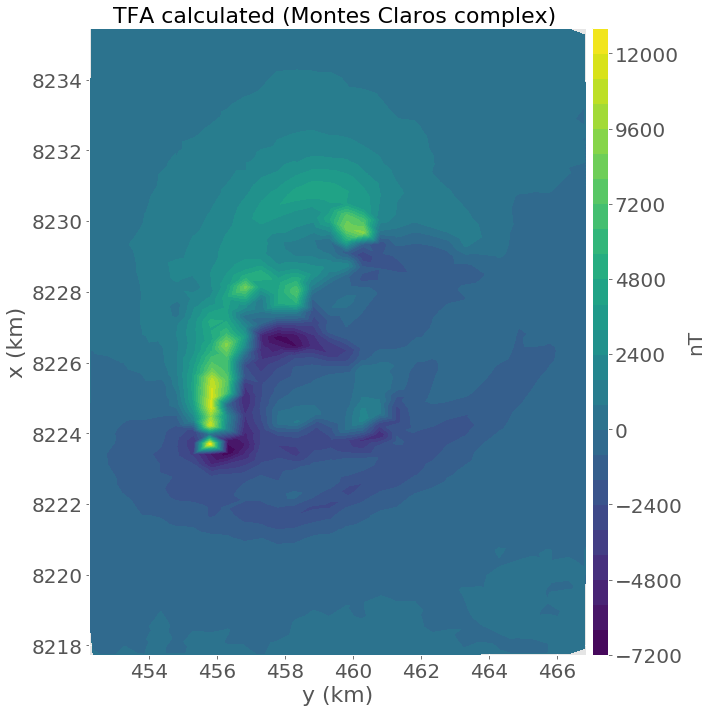

In [36]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('TFA calculated (Montes Claros complex) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['tfa_calc_40'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/tfa_calc_data_montes_claros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Flight variation

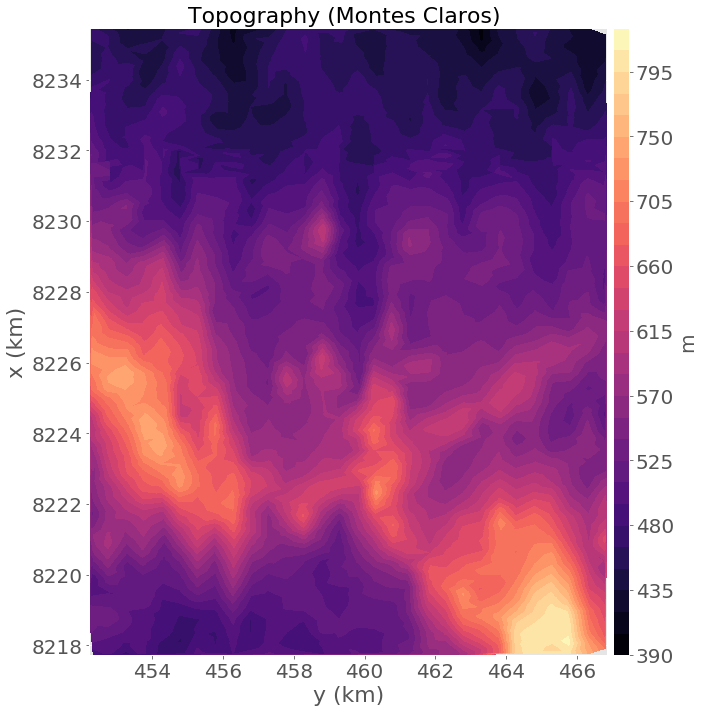

In [37]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('Topography (Montes Claros) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['elev'],30, cmap='magma')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('m',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/elevation_montes_claros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Generating .pickle file

In [38]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [39]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)

## Saved files

In [40]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/data_montes_claros.png
2  figs/data_montes_claros.eps
3  figs/RTP_data_montes_claros.png
4  figs/RTP_data_montes_claros.eps
5  figs/igrf_data_montes_claros.png
6  figs/igrf_data_montes_claros.eps
7  figs/total_field_data_montes_claros.png
8  figs/total_field_data_montes_claros.eps
9  figs/tfa_calc_data_montes_claros.png
10  figs/tfa_calc_data_montes_claros.eps
11  figs/elevation_montes_claros.png
12  figs/elevation_montes_claros.eps
13  data/data_set.pickle
